In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cars-dataset/used_cars_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/cars-dataset/used_cars_data.csv')

In [4]:
data.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [5]:
data.tail(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7243,7243,Renault Duster 85PS Diesel RxL,Chennai,2015,70000,Diesel,Manual,First,19.87 kmpl,1461 CC,83.8 bhp,5.0,NaN,NaN
7244,7244,Chevrolet Aveo 1.4 LS,Pune,2009,45463,Petrol,Manual,First,14.49 kmpl,1399 CC,92.7 bhp,5.0,NaN,NaN
7245,7245,Honda Amaze S i-Vtech,Kochi,2015,44776,Petrol,Manual,First,18.0 kmpl,1198 CC,86.7 bhp,5.0,NaN,NaN
7246,7246,Hyundai Grand i10 AT Asta,Coimbatore,2016,18242,Petrol,Automatic,First,18.9 kmpl,1197 CC,82 bhp,5.0,NaN,NaN
7247,7247,Hyundai EON D Lite Plus,Coimbatore,2015,21190,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN,NaN
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [7]:
data_clean = data.dropna()

In [8]:
data_clean

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
10,10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95
15,15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00
20,20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,5999,Tata Bolt Revotron XT,Chennai,2016,10000,Petrol,Manual,First,17.57 kmpl,1193 CC,88.7 bhp,5.0,7.77 Lakh,4.00
6002,6002,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09 kmpl,1598 CC,103.5 bhp,5.0,11.91 Lakh,3.25
6005,6005,Maruti Vitara Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,9.93 Lakh,7.43
6010,6010,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.5 kmpl,1198 CC,86.8 bhp,5.0,6.63 Lakh,3.20


In [10]:
data_clean_unique = data_clean.drop_duplicates()

In [11]:
data_clean_unique

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
10,10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95
15,15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00
20,20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,5999,Tata Bolt Revotron XT,Chennai,2016,10000,Petrol,Manual,First,17.57 kmpl,1193 CC,88.7 bhp,5.0,7.77 Lakh,4.00
6002,6002,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09 kmpl,1598 CC,103.5 bhp,5.0,11.91 Lakh,3.25
6005,6005,Maruti Vitara Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,9.93 Lakh,7.43
6010,6010,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.5 kmpl,1198 CC,86.8 bhp,5.0,6.63 Lakh,3.20


In [12]:
data_clean_unique.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [14]:
data_clean_unique['S.No.'].value_counts()

S.No.
2       1
4104    1
4022    1
4026    1
4028    1
       ..
2056    1
2059    1
2061    1
2073    1
6014    1
Name: count, Length: 823, dtype: int64

In [15]:
data_clean_unique['Name'].value_counts()

Name
Maruti Alto K10 VXI                        16
Toyota Innova Crysta 2.8 ZX AT             14
BMW 3 Series 320d                          13
Maruti Vitara Brezza ZDi Plus Dual Tone    12
BMW 5 Series 520d Luxury Line              12
                                           ..
Mercedes-Benz GLC 43 AMG Coupe              1
Tata Bolt Quadrajet XM                      1
Hyundai i20 Active SX Petrol                1
Isuzu MUX 4WD                               1
Tata Bolt Revotron XT                       1
Name: count, Length: 321, dtype: int64

In [16]:
data_clean_unique['Location'].value_counts()

Location
Kochi         142
Mumbai        138
Coimbatore    135
Hyderabad      80
Pune           62
Kolkata        55
Delhi          54
Chennai        48
Jaipur         41
Ahmedabad      36
Bangalore      32
Name: count, dtype: int64

In [17]:
data_clean_unique['Year'].value_counts()

Year
2017    215
2016    155
2018    137
2015     70
2014     59
2019     58
2013     45
2012     34
2011     23
2010     16
2008      4
2009      3
2005      1
2007      1
2001      1
2004      1
Name: count, dtype: int64

In [18]:
data_clean_unique['Kilometers_Driven'].value_counts()

Kilometers_Driven
45000    9
29000    8
42000    8
14000    8
40000    8
        ..
28937    1
41372    1
57478    1
42265    1
27365    1
Name: count, Length: 577, dtype: int64

In [19]:
data_clean_unique['Fuel_Type'].value_counts()

Fuel_Type
Diesel    443
Petrol    371
CNG         9
Name: count, dtype: int64

In [20]:
data_clean_unique['Transmission'].value_counts()

Transmission
Manual       512
Automatic    311
Name: count, dtype: int64

In [21]:
data_clean_unique['Owner_Type'].value_counts()

Owner_Type
First     765
Second     55
Third       3
Name: count, dtype: int64

In [22]:
data_clean_unique['Mileage'].value_counts()

Mileage
24.3 kmpl      36
18.9 kmpl      32
22.5 kmpl      28
28.4 kmpl      27
11.36 kmpl     23
               ..
32.26 km/kg     1
21.72 kmpl      1
17.84 kmpl      1
12.62 kmpl      1
13.7 kmpl       1
Name: count, Length: 152, dtype: int64

In [23]:
data_clean_unique['Engine'].value_counts()

Engine
1248 CC    92
1197 CC    81
998 CC     64
1498 CC    55
1995 CC    53
2755 CC    37
1497 CC    35
1199 CC    33
1198 CC    21
1798 CC    20
2393 CC    20
1591 CC    20
1968 CC    19
1582 CC    17
1461 CC    17
799 CC     16
2143 CC    15
1193 CC    14
1956 CC    14
1999 CC    13
1196 CC    12
999 CC     11
2987 CC    11
1186 CC    10
2993 CC    10
1598 CC    10
2179 CC    10
1364 CC     9
1950 CC     8
1496 CC     8
1998 CC     8
2523 CC     7
2477 CC     6
1462 CC     6
2967 CC     4
2996 CC     4
1194 CC     3
1969 CC     3
1493 CC     3
2894 CC     2
1396 CC     2
2489 CC     2
2498 CC     2
1991 CC     2
2198 CC     1
1997 CC     1
1086 CC     1
2925 CC     1
4951 CC     1
2487 CC     1
1984 CC     1
1395 CC     1
2995 CC     1
2999 CC     1
1595 CC     1
2694 CC     1
1368 CC     1
1047 CC     1
Name: count, dtype: int64

In [24]:
data_clean_unique['Power'].value_counts()

Power
190 bhp       55
81.86 bhp     41
88.5 bhp      39
67.04 bhp     38
88.7 bhp      32
              ..
174.57 bhp     1
67.05 bhp      1
99.6 bhp       1
58.2 bhp       1
103 bhp        1
Name: count, Length: 115, dtype: int64

In [25]:
data_clean_unique['Seats'].value_counts()

Seats
5.0    672
7.0    122
4.0     15
8.0      8
6.0      4
2.0      2
Name: count, dtype: int64

In [26]:
data_clean_unique['New_Price'].value_counts()

New_Price
95.13 Lakh    6
4.78 Lakh     6
63.71 Lakh    6
11.26 Lakh    5
44.28 Lakh    5
             ..
39.6 Lakh     1
1.27 Cr       1
38.11 Lakh    1
8.12 Lakh     1
9.93 Lakh     1
Name: count, Length: 540, dtype: int64

In [27]:
data_clean_unique['Price'].value_counts()

Price
4.50     11
5.00     10
5.50     10
4.00      9
3.75      8
         ..
6.36      1
17.11     1
6.76      1
3.67      1
7.43      1
Name: count, Length: 508, dtype: int64

In [28]:
data_clean_unique.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,823.000000,823.000000,823.000000,823.000000,823.000000
mean,3017.058323,2015.869988,40498.402187,5.304982,13.647606
std,1775.572600,2.378709,28791.171759,0.795707,14.860539
min,2.000000,2001.000000,600.000000,2.000000,0.700000
25%,1522.000000,2015.000000,20487.500000,5.000000,5.000000
50%,2916.000000,2016.000000,34895.000000,5.000000,8.200000
75%,4650.500000,2017.000000,53829.000000,5.000000,17.500000
max,6014.000000,2019.000000,215000.000000,8.000000,160.000000


Data Visualization

In [29]:
data_clean_unique.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

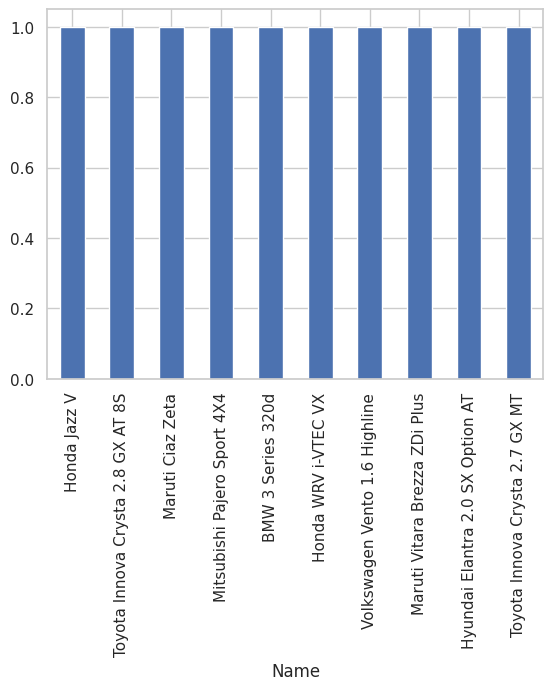

In [33]:
# Bar chart 
data_clean_unique['Name'].head(10).value_counts().plot(kind='bar')
plt.show()

Name columns chart showed that have same trends

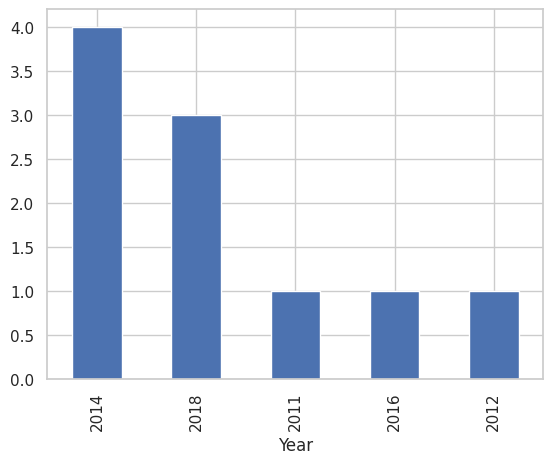

In [34]:
# Bar chart 
data_clean_unique['Year'].head(10).value_counts().plot(kind='bar')
plt.show()

The most buyer in 2014 and 2018

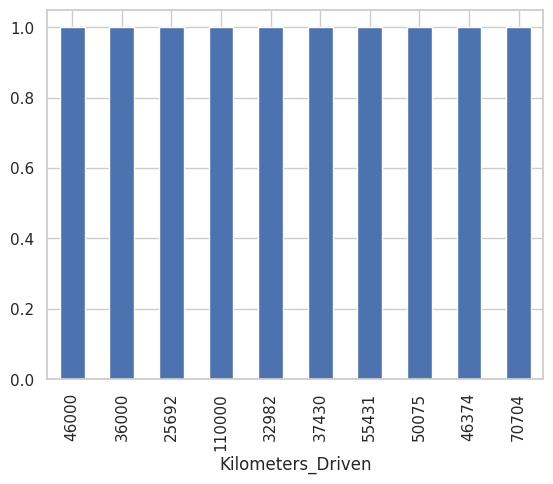

In [35]:
# Bar chart 
data_clean_unique['Kilometers_Driven'].head(10).value_counts().plot(kind='bar')
plt.show()

In Kilometers driven have same trends chart

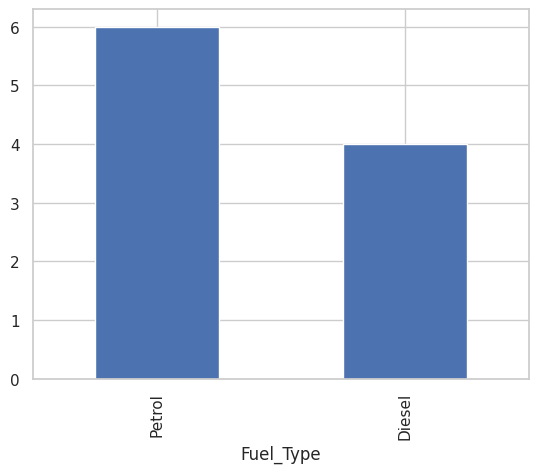

In [36]:
# Bar chart 
data_clean_unique['Fuel_Type'].head(10).value_counts().plot(kind='bar')
plt.show()

Buyer choose petrol for fuel type

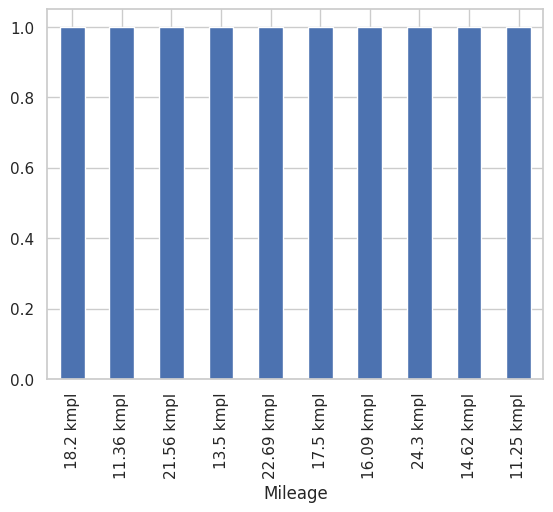

In [37]:
# Bar chart 
data_clean_unique['Mileage'].head(10).value_counts().plot(kind='bar')
plt.show()

These have same trends

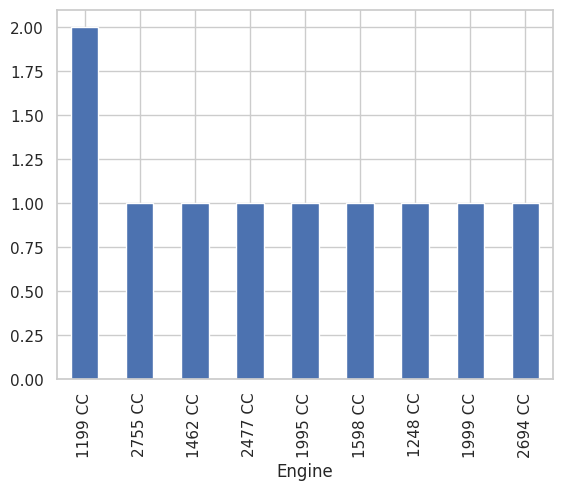

In [39]:
# Bar chart 
data_clean_unique['Engine'].head(10).value_counts().plot(kind='bar')
plt.show()

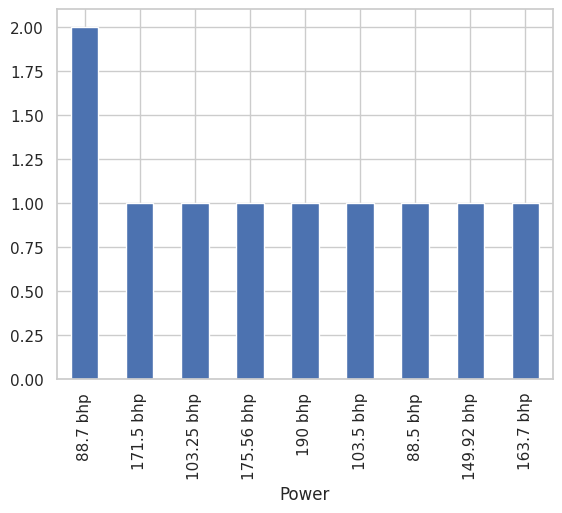

In [40]:
# Bar chart 
data_clean_unique['Power'].head(10).value_counts().plot(kind='bar')
plt.show()

Buyer choose 88.7 bhp in power

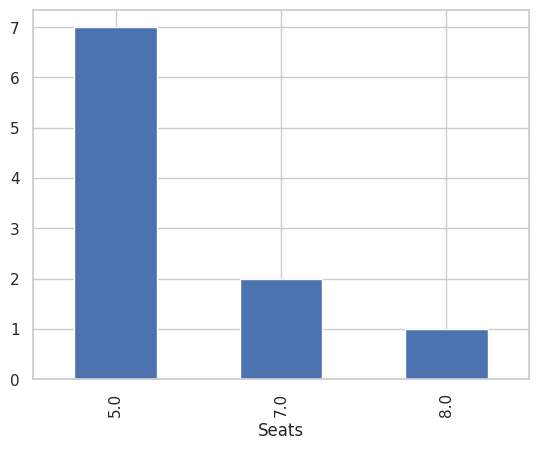

In [42]:
# Bar chart 
data_clean_unique['Seats'].head(10).value_counts().plot(kind='bar')
plt.show()

The most seat comfortable is 5.0 .  

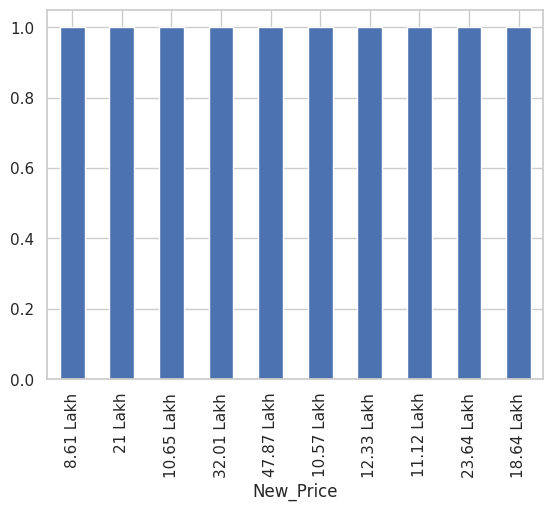

In [41]:
# Bar chart 
data_clean_unique['New_Price'].head(10).value_counts().plot(kind='bar')
plt.show()

New Price have same trends

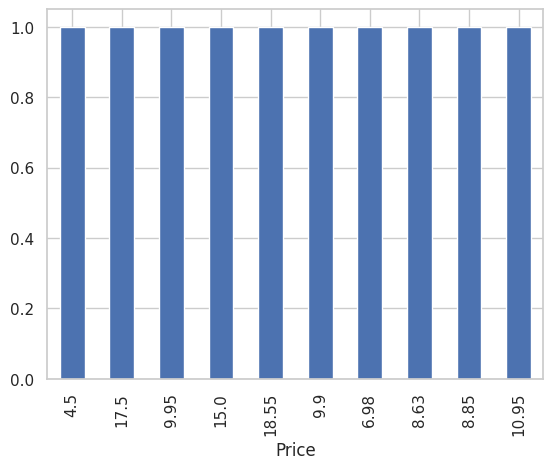

In [43]:
# Bar chart 
data_clean_unique['Price'].head(10).value_counts().plot(kind='bar')
plt.show()

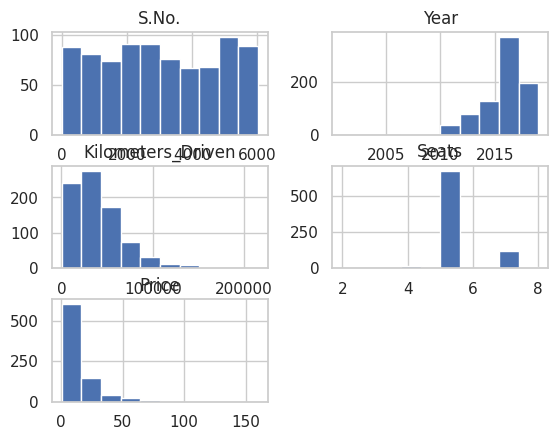

In [44]:
# histograms
data_clean_unique.hist()
plt.show()

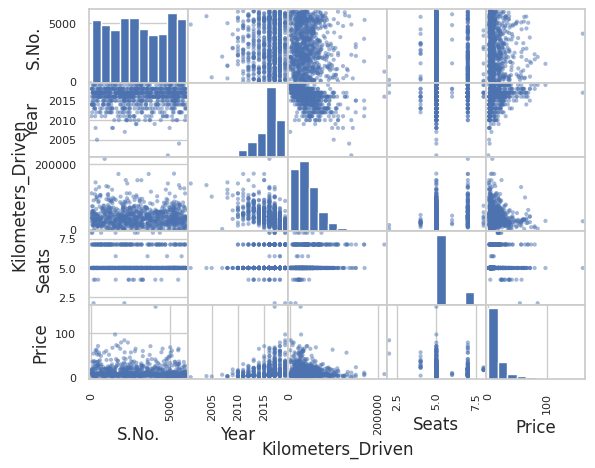

In [46]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(data_clean_unique)
plt.show()

In scatter plot showed :

* Price : strong relationship
* Kilometer Driven : strong relationship
* Seat : Need more improvement
* Year : strong relationship and achieve strong trends year by years